# Laboratório de detecção de faces em visão por computação - Notebook do aluno

Neste laboratório, você usará o Amazon Rekognition para realizar a detecção de uma face conhecida.

As etapas de alto nível que você executará neste laboratório são:

1. Criar uma coleção.

2. Fazer o upload de uma imagem de uma face que você deseja detectar no notebook do Amazon SageMaker.

3. Adicionar a imagem à coleção.

4. Visualizar a caixa delimitadora que foi criada para a imagem.

5. Relacionar as faces da coleção.

6. Usar a coleção para encontrar uma face.

7. Visualizar a caixa delimitadora da face que foi encontrada.

8. Excluir a coleção.

---

## Importação de pacotes do Python

Comece importando os pacotes do Python necessários.

No código a seguir:

- *matplotlib* fornece funções de plotagem
- *skimage* representa scikit-image, que fornece várias ferramentas úteis de manipulação de imagens
- *boto3* representa o AWS SDK para Python (Boto3), que é a biblioteca Python da AWS
- *numpy* representa NumPy, que é uma biblioteca para manipular dados
- *PIL* representa a Biblioteca de imagens do Python, que contém um conjunto de ferramentas para desenhar imagens


In [1]:
from skimage import io
from skimage.transform import rescale
from matplotlib import pyplot as plt

import boto3

import numpy as np

from PIL import Image, ImageDraw, ImageColor, ImageOps


Matplotlib is building the font cache; this may take a moment.


## Tarefa 1: Criar uma coleção

Nesta tarefa, você cria uma coleção no Amazon Rekognition.

Você só precisa executar essa etapa uma vez.


In [2]:
client = boto3.client('rekognition')
collection_id = 'Collection'
response = client.create_collection(CollectionId=collection_id)
print('Collection ARN: ' + response['CollectionArn'])
print('Status Code:' + str(response['StatusCode']))
print('Done...')

Collection ARN: aws:rekognition:us-east-1:138166842132:collection/Collection
Status Code:200
Done...


## Tarefa 2: Fazer o upload de uma imagem para pesquisa

Use a imagem de exemplo fornecida, denominada *mum.jpg*, e faça o upload dela para este notebook.

Em seguida, observe a imagem executando a célula.


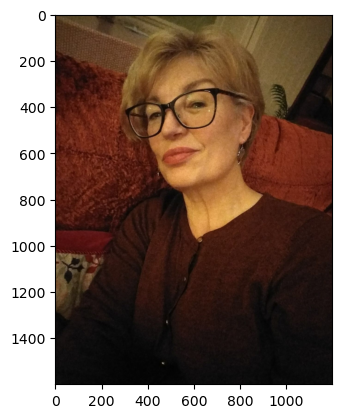

In [3]:
filename = "mum.jpg"

faceimage = io.imread(filename)

plt.imshow(faceimage)


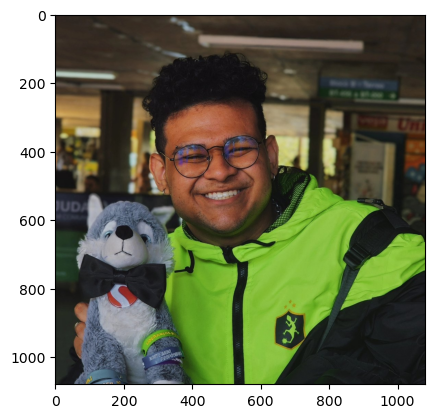

In [11]:
me = "pfpinsta.jpg"
filename2 = "pfpinsta.jpg"
me = io.imread(me)

plt.imshow(me)




Certifique-se de que o tamanho da imagem seja inferior a 4096 x 4096 pixels. Se a imagem tiver um tamanho superior, você deverá redimensioná-la usando o seguinte código:

`faceimage = rescale(faceimage, 0.50, mode='constant')`

**Observação:** O valor numérico representa o fator a ser usado no dimensionamento. Um valor de *0,5* dimensionará a imagem para 50% do original.

Quando a imagem for redimensionada, salve o arquivo.

`io.imsave(filename, faceimage)`

**Dica:** você deve copiar o código em uma célula de código e executá-lo.


## Tarefa 3: Adicionar a imagem à coleção

Adicione a imagem à coleção que você criou anteriormente.


In [14]:
externalimageid = filename2

with open(filename, 'rb') as fimage:
    response = client.index_faces(CollectionId = collection_id,
                             Image={'Bytes': fimage.read()},
                             ExternalImageId=externalimageid,
                             MaxFaces=1,
                             QualityFilter="AUTO",
                             DetectionAttributes=['ALL'])

print('Results for ' + filename)
print('Faces indexed:')
for faceRecord in response['FaceRecords']:
     print('  Face ID: ' + faceRecord['Face']['FaceId'])
     print('  Location: {}'.format(faceRecord['Face']['BoundingBox']))

print('Faces not indexed:')
for unindexedFace in response['UnindexedFaces']:
    print(' Location: {}'.format(unindexedFace['FaceDetail']['BoundingBox']))
    print(' Reasons:')
    for reason in unindexedFace['Reasons']:
        print('   ' + reason)

Results for mum.jpg
Faces indexed:
  Face ID: 4898e3a3-a239-4360-b3db-a2bbdafb225f
  Location: {'Width': 0.3483645021915436, 'Height': 0.35312092304229736, 'Left': 0.30951350927352905, 'Top': 0.11020112037658691}
Faces not indexed:


## Tarefa 4: Visualizar a caixa delimitadora da face detectada

Se uma face tiver sido encontrada, os resultados deverão incluir o local da face que foi detectada. Examine a caixa delimitadora na imagem.

Para fazer isso, use a biblioteca PIL, que você importou anteriormente neste laboratório. Ao extrair a caixa delimitadora, você pode desenhar um conjunto de linhas em torno da imagem.


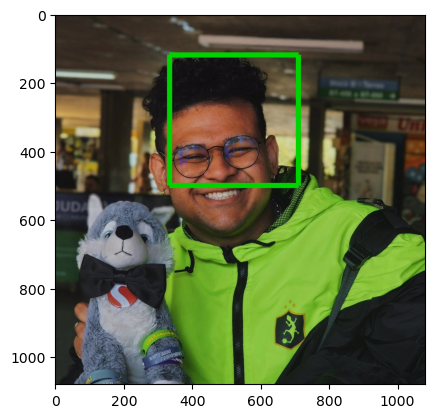

In [15]:

img = Image.open(filename2)
imgWidth, imgHeight = img.size

draw = ImageDraw.Draw(img)
for faceRecord in response['FaceRecords']:
    box = faceRecord['Face']['BoundingBox']
    left = imgWidth * box['Left']
    top = imgHeight * box['Top']
    width = imgWidth * box['Width']
    height = imgHeight * box['Height']

    points = ((left,top),(left+width,top),(left+width,top+height),(left,top+height),(left,top))

    draw.line(points,fill='#00d400', width=15)
    
plt.imshow(img)

## Tarefa 5: Listar faces na coleção

Examine a imagem que você tem na coleção. 



In [16]:
maxResults=2
faces_count=0
tokens=True

response=client.list_faces(CollectionId=collection_id,
                           MaxResults=maxResults)

print('Faces in collection ' + collection_id)

while tokens:

    faces=response['Faces']

    for face in faces:
        print (face)
        faces_count+=1
    if 'NextToken' in response:
        nextToken=response['NextToken']
        response=client.list_faces(CollectionId=collection_id,
                                   NextToken=nextToken,MaxResults=maxResults)
    else:
        tokens=False

Faces in collection Collection
{'FaceId': '4898e3a3-a239-4360-b3db-a2bbdafb225f', 'BoundingBox': {'Width': 0.34836500883102417, 'Height': 0.3531210124492645, 'Left': 0.30951398611068726, 'Top': 0.11020100116729736}, 'ImageId': '04bb91b4-89e2-3e7a-8677-af502e657b2f', 'ExternalImageId': 'pfpinsta.jpg', 'Confidence': 99.99430084228516, 'IndexFacesModelVersion': '7.0'}
{'FaceId': 'e98b226c-1566-413a-a27b-c8d17f32d2c6', 'BoundingBox': {'Width': 0.34836500883102417, 'Height': 0.3531210124492645, 'Left': 0.30951398611068726, 'Top': 0.11020100116729736}, 'ImageId': '59d87d59-b733-306a-94e8-0670b0a8dcdd', 'ExternalImageId': 'mum.jpg', 'Confidence': 99.99430084228516, 'IndexFacesModelVersion': '7.0'}


## Tarefa 6: Encontrar uma face usando a coleção

Nesta etapa, você usará a coleção para detectar uma face em uma imagem.

Use a imagem de exemplo fornecida denominada *target.jpg* e faça o upload dela para este notebook.



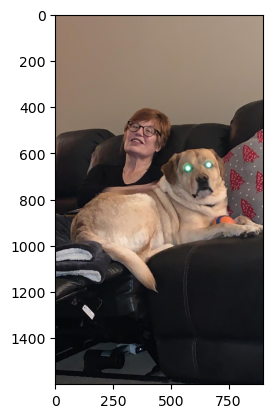

In [17]:
targetfilename = "target.jpg"

targetimage = Image.open(targetfilename)
plt.imshow(targetimage)

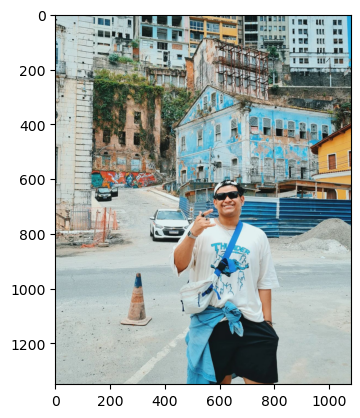

In [19]:
targetfilename2 = "salvador.jpg"

targetimage2 = Image.open(targetfilename2)
plt.imshow(targetimage2)

Em seguida, chame a operação `search_faces_by_image` e veja se obtém uma correspondência.

In [ ]:
threshold = 70
maxFaces=2

with open(targetfilename, 'rb') as timage:        
    response2=client.search_faces_by_image(CollectionId=collection_id,
                            Image={'Bytes': timage.read()},
                            FaceMatchThreshold=threshold,
                            MaxFaces=maxFaces)

faceMatches=response2['FaceMatches']
print ('Matching faces')
for match in faceMatches:
        print ('FaceId:' + match['Face']['FaceId'])
        print ('Similarity: ' + "{:.2f}".format(match['Similarity']) + "%")
        print ('ExternalImageId: ' + match['Face']['ExternalImageId'])
        print

## Tarefa 7: Desenhar uma caixa delimitadora em torno da face descoberta

Desenhe uma caixa delimitadora em torno da face descoberta.

In [ ]:
imgWidth, imgHeight = targetimage.size

draw = ImageDraw.Draw(targetimage)

box = response2['SearchedFaceBoundingBox']
left = imgWidth * box['Left']
top = imgHeight * box['Top']
width = imgWidth * box['Width']
height = imgHeight * box['Height']

points = ((left,top),(left+width,top),(left+width,top+height),(left,top+height),(left,top))
draw.line(points,fill='#00d400', width=15)
    
plt.imshow(targetimage)

## Tarefa 8: Excluir a coleção

Quando terminar, exclua a coleção. Para fazer isso, execute o código a seguir. 


In [ ]:
print('Attempting to delete collection ' + collection_id)
status_code=0
try:
    response=client.delete_collection(CollectionId=collection_id)
    status_code=response['StatusCode']
    print('All done!')
    print(status_code)
    
except ClientError as e:
    if e.response['Error']['Code'] == 'ResourceNotFoundException':
        print ('The collection ' + collection_id + ' was not found ')
    else:
        print ('Error other than Not Found occurred: ' + e.response['Error']['Message'])
    status_code=e.response['ResponseMetadata']['HTTPStatusCode']



# Parabéns!

Você concluiu este laboratório e agora pode encerrá-lo seguindo as instruções do guia do laboratório.